In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

aspect_ratio = 16./9
BoiseState_blue = '#0033A0'
BoiseState_orange = '#D64309'

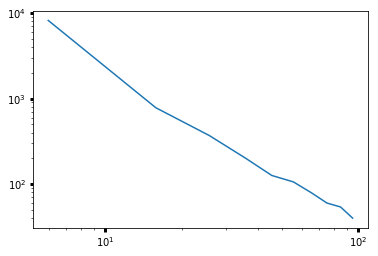

In [37]:
def diameter_distribution(Pr, Dmin=1., Dmax=100., gamma=1.6):
    rho_0 = (-gamma + 1.)/(Dmax**(-gamma + 1.) - Dmin**(-gamma + 1.))
        
    return ((-gamma + 1.)*Pr/rho_0 + Dmin**(-gamma + 1.))**(1./(-gamma + 1.))

num_samples = 10000
rand_nums = np.random.random(num_samples)

rand_diameters = diameter_distribution(rand_nums)
hst, bin_edges = np.histogram(rand_diameters)

bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.loglog(bins, hst)

[-0.00514255  0.11105061] [6.45496620e-07 1.26143882e-04]


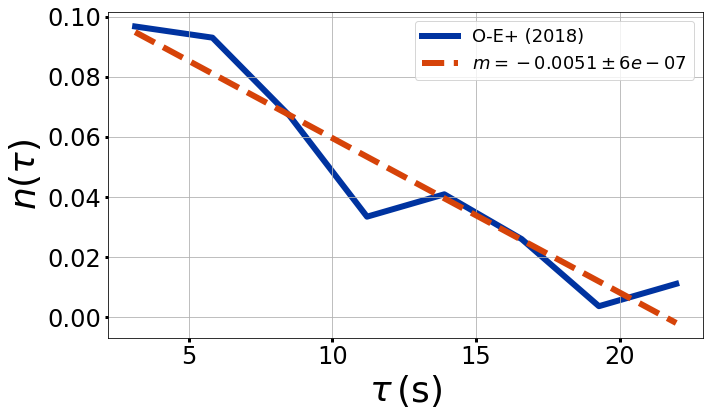

In [85]:
# 2019 Aug 9 - Look at Ordonez-Etxeberria et al. (2018) data
#   https://www.sciencedirect.com/science/article/pii/S0019103516306376

durations = np.genfromtxt("Ordonez2018_durations.txt")
durations_hst, bin_edges = np.histogram(durations, bins='auto', density=True)
durations_bins = 0.5*(bin_edges[1:] + bin_edges[0:-1])
# err = np.sqrt(durations_hst)
# log_err = err/(hst*np.log(10.))

# Fit power-law
ind = hst > 0
p, p_err = np.polyfit(durations_bins[ind], durations_hst[ind], 1, cov=True)

print(p, p_err.diagonal())

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax1 = fig.add_subplot(111)

ax1.plot(durations_bins, durations_hst, lw=6, color=BoiseState_blue, label="O-E+ (2018)", zorder=-1)
ax1.plot(durations_bins[ind], np.polyval(p, durations_bins[ind]), lw=6, ls="--", color=BoiseState_orange, 
        label="$m = %.2g\\pm%.1g$" % (p[0], p_err.diagonal()[0]))

ax1.tick_params(which='both', labelsize=24)
ax1.set_xlabel("$\\tau\,({\\rm s})$", fontsize=36)
ax1.set_ylabel("$n(\\tau)$", fontsize=36)
ax1.grid(True)
ax1.legend(loc='best', fontsize=18)

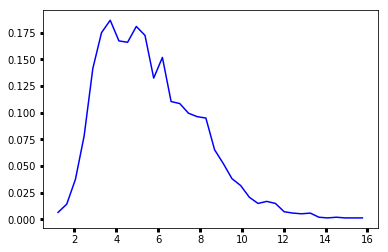

In [56]:
velocities = np.loadtxt('TELLTALE_91_151.TAB', delimiter=',', usecols=[3])
velocity_hst, binedges = np.histogram(velocities, bins='fd', density=True)
velocity_bins = 0.5*(binedges[1:] + binedges[:-1])
plt.plot(velocity_bins, velocity_hst, color='b')

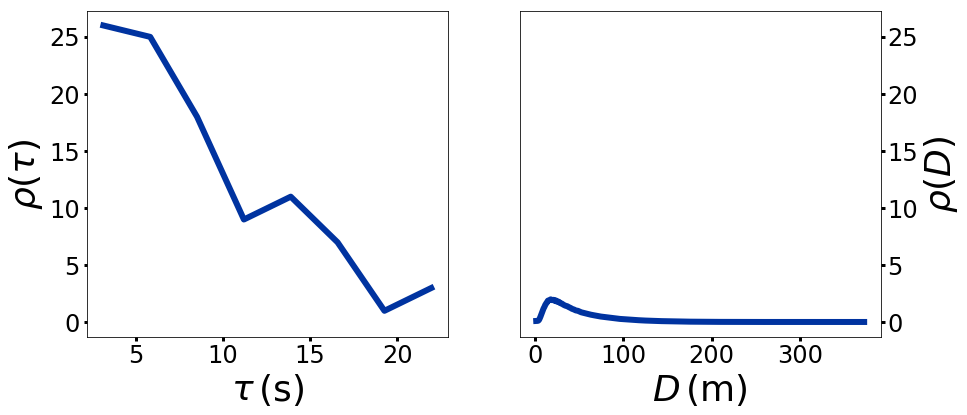

In [81]:
# What is the range of possible widths?
min_width = np.min(velocities)*np.min(durations)
max_width = np.max(velocities)*np.max(durations)
widths = np.linspace(np.floor(min_width), np.ceil(max_width), 1000)
rho_widths = np.zeros_like(widths)

for i in range(len(rho_widths)):
    for j in range(len(durations)):    
        velocity = widths[i]/durations[j]
        rho_widths[i] += np.interp(velocity, velocity_bins, velocity_hst)/durations[j]
    
fig = plt.figure(figsize=(8*aspect_ratio, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

ax1.plot(durations_bins, durations_hst, lw=6, color=BoiseState_blue, zorder=-1)
ax1.tick_params(which='both', labelsize=24)
ax1.set_xlabel("$\\tau\,({\\rm s})$", fontsize=36)
ax1.set_ylabel("$\\rho(\\tau)$", fontsize=36)

ax2.plot(widths, rho_widths, lw=6, color=BoiseState_blue, zorder=-1)
ax2.tick_params(which='both', labelsize=24)
ax2.set_xlabel("$D\,({\\rm m})$", fontsize=36)
ax2.set_ylabel("$\\rho(D)$", fontsize=36)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()